Copypaste from this tutorial: https://blog.keras.io/building-autoencoders-in-keras.html

In [123]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model
from keras import regularizers
import matplotlib.pyplot as plt

In [46]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [47]:
def build_model(encoding_dim=32, input_shape=(784,), sparsity=10e-5):

    # this is the size of our encoded representations
    encoding_dim = encoding_dim  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

    # this is our input placeholder
    input_img = Input(shape=input_shape)
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='relu',
                    activity_regularizer=regularizers.l1(sparsity))(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(input_shape[0], activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)


    # this model maps an input to its encoded representation
    encoder = Model(input_img, encoded)


    # create a placeholder for an encoded (encoding_dim-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]
    # create the decoder model
    decoder = Model(encoded_input, decoder_layer(encoded_input))


    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    

    return autoencoder, encoder, decoder

In [171]:
autoencoder, encoder, decoder = build_model(encoding_dim=36, input_shape=(784,), sparsity=10e-8)

In [172]:
autoencoder.set_weights(nonreg_weights)

In [173]:
history = autoencoder.fit(x_train, x_train,
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1067 - val_loss: 0.1051
Epoch 2/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1063 - val_loss: 0.1047
Epoch 3/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1059 - val_loss: 0.1043
Epoch 4/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.1055 - val_loss: 0.1039
Epoch 5/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1051 - val_loss: 0.1035
Epoch 6/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1048 - val_loss: 0.1032
Epoch 7/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1045 - val_loss: 0.1029
Epoch 8/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1042 - val_loss: 0.1026
Epoch 9/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1039 - val_loss: 0.1

60000/60000 [==============================] - 5s 80us/step - loss: 0.0967 - val_loss: 0.0953
Epoch 78/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.0966 - val_loss: 0.0953
Epoch 79/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.0966 - val_loss: 0.0953
Epoch 80/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.0965 - val_loss: 0.0952
Epoch 81/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.0965 - val_loss: 0.0952
Epoch 82/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.0965 - val_loss: 0.0952
Epoch 83/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.0964 - val_loss: 0.0951
Epoch 84/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0964 - val_loss: 0.0951
Epoch 85/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.0964 - val_loss: 0.0950
Epoch 86/100
60000/60000 [========================

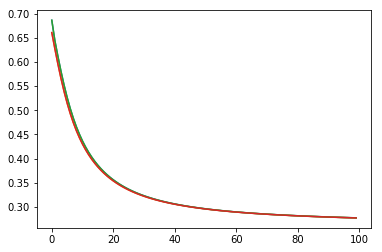

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

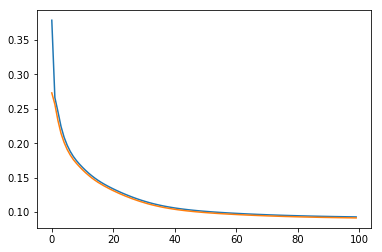

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

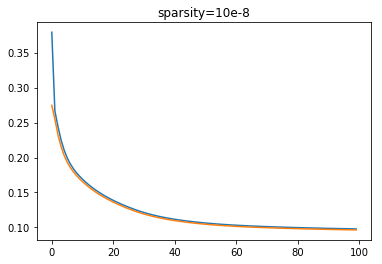

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('sparsity=10e-8')
plt.show()

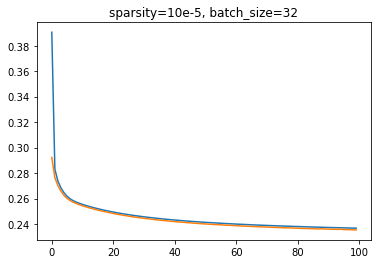

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('sparsity=10e-5, batch_size=32')
plt.show()

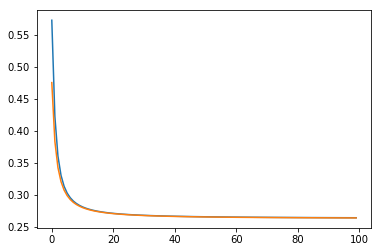

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

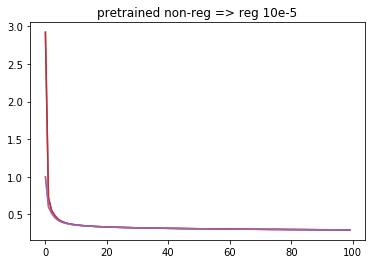

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('pretrained non-reg => reg 10e-5')
plt.show()

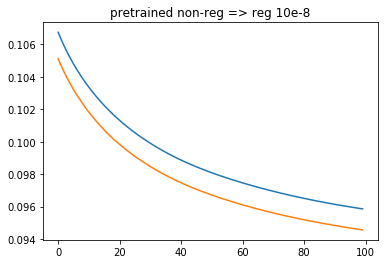

In [175]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('pretrained non-reg => reg 10e-8')
plt.show()

In [ ]:
#encoded_means = []
#decoded_means = []

In [176]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
encoded_means.append(encoded_imgs.mean())
decoded_imgs = decoder.predict(encoded_imgs)
decoded_means.append(decoded_imgs.mean())

In [117]:
del encoded_means[-1]
del decoded_means[-1]

In [177]:
print(encoded_means)
print(decoded_means)

[1.4260025e-06, 9.9171882e-07, 8.1915357e-07, 2.0820557e-06, 8.3174257, 5.1715345, 0.068635821, 4.2301922e-06, 7.0658627, 0.038373031, 5.2058678]
[0.1494972, 0.14949784, 0.14949322, 0.14949697, 0.13287909, 0.13306007, 0.13261288, 0.13219836, 0.13278764, 0.13416925, 0.13289116]


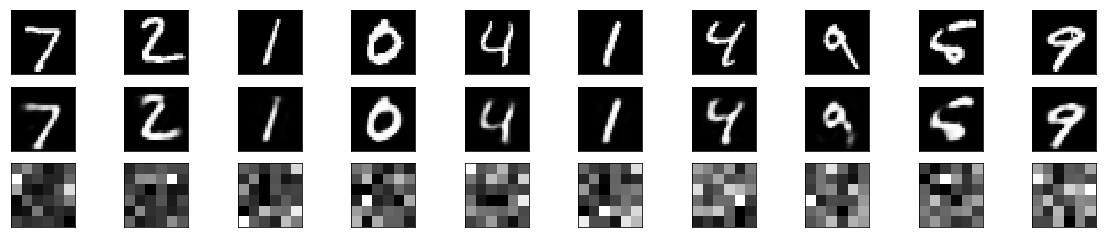

In [178]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display representations
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(encoded_imgs[i].reshape(6, 6))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [144]:
autoencoder.save('data/models_log/36_sparsity_10e-5_pretrained_autoencoder')
encoder.save('data/models_log/36_sparsity_10e-5_pretrained_encoder')
decoder.save('data/models_log/36_sparsity_10e-5_pretrained_decoder')

In [124]:
autoencoder = load_model('data/models_log/36_autoencoder')
encoder = load_model('data/models_log/36_encoder')
decoder = load_model('data/models_log/36_decoder')

/Users/utanashati/miniconda3/lib/python3.6/site-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [135]:
nonreg_weights = autoencoder.get_weights()